# 70. Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

 

Example 1:

Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps
Example 2:

Input: n = 3
Output: 3
Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step

1 <= n <= 45

## Breakdown of problem and approach:

### Problem explanation:
- We need to find the number of distinct ways to climb to the top of a staircase with n steps, given that we can take either 1 or 2 steps at a time.

### Base Cases:
- If n = 1, then there is only 1 way to climb the staircase (one step at a time)
- If n = 2, then there are 2 ways to climb the staircase (either two single steps or one double step)

### Recurrence: 

For this question, there are a bunch of people who have described their mindset. Rather than list the code, I will draw the image of climbing the stairs

First things first, we can only climb 1 start or 2 starts at the very beginning.
So here is an image of telling the number of methods to climb 1 start and 2 stairs:

As we can see, there is only 1 way to climb 1 stair; and there are 2 ways to climb 2 stairs: 1 stair and 1 stair; 2 stairs for 1 time

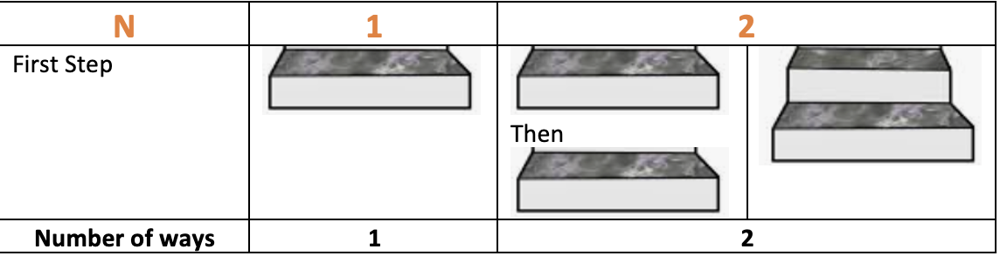

What if N = 3?

Again, we can only climb 1 stair or 2 stairs for the first step. If we climb 1 stair, we have 2 stairs left, which is the situation for "N = 2", which is 2 ways; and if we climb 2 stairs, we have 1 stair left, which is the situation for "N = 1", which is 1 way. So total 2 + 1 = 3 ways

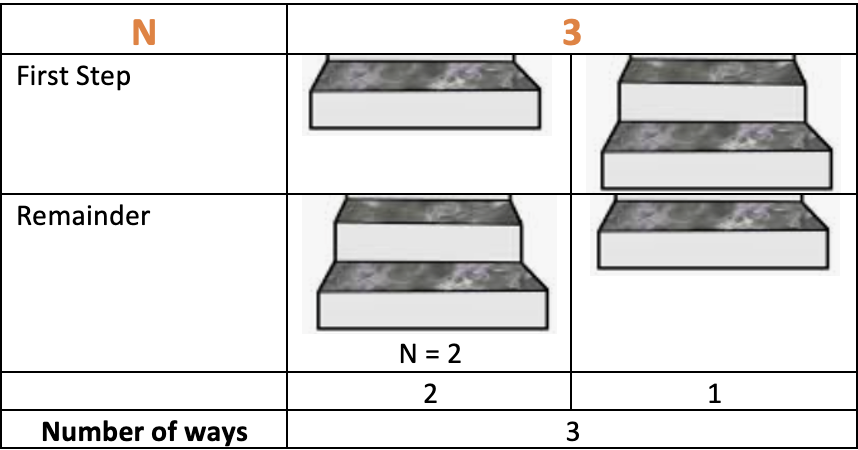

What if N = 4?
Again, we can only climb 1 stair or 2 stairs for the first step. If we climb 1 stair, we will have 3 stairs left, which is the situation for "N = 3", which is 3 ways; and if we climb 2 stairs, we will have 2 stairs left, which is the situation for "N = 2", which is 2 ways. So in total 3 + 2 = 5 ways.

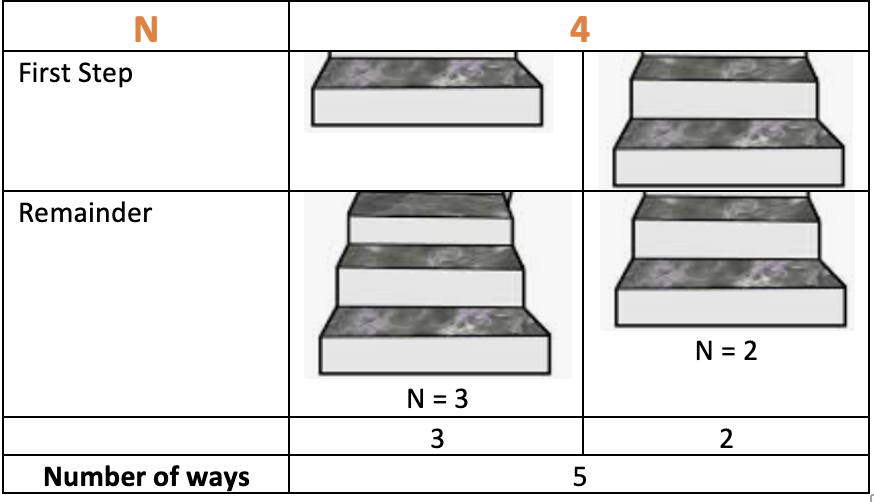

We can find that if there is x stairs(x is a number), the number of ways to climb is the ways to climb x-1 plus the ways to climb x-2:
imagewhich, is the famous fibonacci sequence that "each number is the sum of the two preceding ones, starting from 0 and 1"

Here’s a more detailed explanation:

- (n-1)-th Step: To reach the (n-1)-th step, you could have come from the (n-2)-th step by taking one step, or from the (n-3)-th step by taking two steps. The total number of ways to reach the (n-1)-th step is therefore the sum of the ways to reach the (n-2)-th and (n-3)-th steps.

- (n-2)-th Step: Similarly, to reach the (n-2)-th step, you could have come from the (n-3)-th step by taking one step, or from the (n-4)-th step by taking two steps. Again, the total number of ways to reach the (n-2)-th step is the sum of the ways to reach the (n-3)-th and (n-4)-th steps.

Now, when you are at the (n-1)-th step, you have only one choice to reach the top, which is to take one more step. When you are at the (n-2)-th step, you have two choices: you can either take one step to the (n-1)-th step and then another to the top, or you can take a double step right to the top.

Therefore, the number of ways to reach the n-th step (the top) can be calculated as follows:
        Ways to reach n-th step=Ways to reach (n-1)-th step+Ways to reach (n-2)-th step

This is because:
- From the (n-1)-th step, you can take 1 step to reach the top.
- From the (n-2)-th step, you can take 2 steps in one move to reach the top.

By applying this logic recursively, we can calculate the number of ways to reach each step, building up from the base cases (where n = 1 and n = 2) to the final step n.

### Dynamic Programming Approach:

- We can use a bottom-up approach to build an array (dp) where each element dp[i] represents the number of ways to reach the i-th step

In [5]:
def climb_stairs(n):
    # Assume the input will be a positive number for this problem
    if n <= 2:
        return n

    # Initialize the array based on n and populate with the base cases:
    # Create an array of 0's
    dp = [0] * (n + 1)
    dp[1] = 1
    dp[2] = 2

    # Fill in the array using the recurrence (summing the previous two steps to get the next step value)
    # Start with range 3 as 0, 1, 2 are already accounted for in our array:
    for i in range(3, n+ 1):
        dp[i] = dp[i-1] + dp[i-2]

    # Since we want the value of the number of ways to reach the nth step, we can return the value at the index n
    return dp[n]

In [6]:
climb_stairs(5)

8

In [8]:
climb_stairs(20)

10946

# Note this becomes the fibonacci problem

The only differences:
- starting a and b at 1 and 2
- range goes up until n-1 since we start a at 1

In [14]:
def fib_climb(n):
    a = 1
    b = 2
    if n <= 2:
        return n
    else:
        for i in range(1, n - 1):
            result = a + b
            a = b
            b = result
    return result 

In [15]:
fib_climb(20)

10946